Question 1: Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
2. What metric would you report for this dataset?
3. What is its value?

In [49]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
#import data
shopdata = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
shopdata.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [51]:
#check data
shopdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [52]:
shopdata.isna().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [53]:
shopdata.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


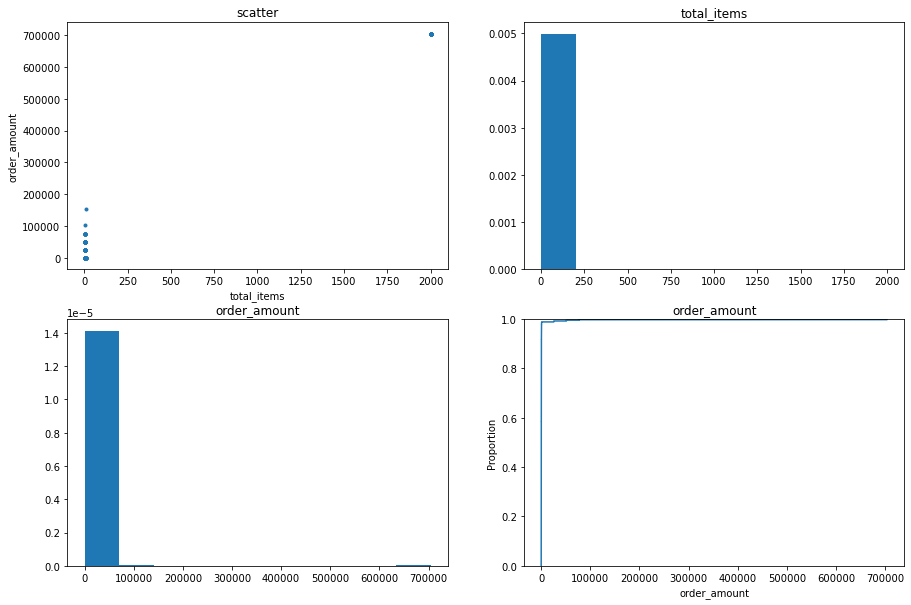

In [54]:
#plot
fig = plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.scatter(shopdata.total_items, shopdata.order_amount, marker='.')
plt.xlabel('total_items')
plt.ylabel('order_amount')
plt.title('scatter')

plt.subplot(222)
plt.hist(shopdata.total_items, density=True)
plt.title('total_items')

plt.subplot(223)
plt.hist(shopdata.order_amount, density=True)
plt.title('order_amount')

plt.subplot(224)
sns.ecdfplot(data=shopdata, x='order_amount')
plt.title('order_amount')

plt.show()

In [55]:
#check outliers
outliers = shopdata.total_items >= 1500
shopdata[outliers]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


In [56]:
#aov without outliers
shopdata[~outliers]['order_amount'].mean()

754.0919125025085

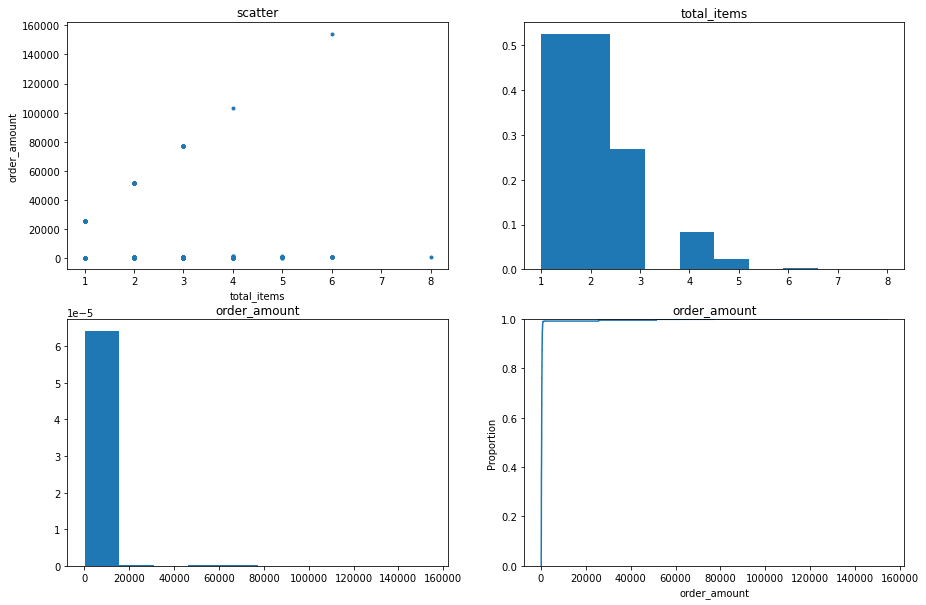

In [57]:
#plot
fig = plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.scatter(shopdata[~outliers].total_items, shopdata[~outliers].order_amount, marker='.')
plt.xlabel('total_items')
plt.ylabel('order_amount')
plt.title('scatter')

plt.subplot(222)
plt.hist(shopdata[~outliers].total_items, density=True)
plt.title('total_items')

plt.subplot(223)
plt.hist(shopdata[~outliers].order_amount, density=True)
plt.title('order_amount')

plt.subplot(224)
sns.ecdfplot(data=shopdata[~outliers], x='order_amount')
plt.title('order_amount')

plt.show()

In [58]:
#median without outliers as metric
shopdata[~outliers]['order_amount'].median()

284.0